In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
np.random.seed(19680801)
import itertools

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [6]:
d1 = pd.read_csv("gold_2_prized_bb.csv")
print(len(d1))
print(d1.dtypes)

44
pmid                   int64
year                   int64
-5                   float64
-4                   float64
-3                   float64
-2                   float64
-1                   float64
0                    float64
1                    float64
2                    float64
3                    float64
4                    float64
5                    float64
6                    float64
7                    float64
8                    float64
9                    float64
cl_-5                  int64
cl_-4                  int64
cl_-3                  int64
cl_-2                  int64
cl_-1                  int64
cl_0                   int64
cl_1                   int64
cl_2                   int64
cl_3                 float64
cl_4                 float64
cl_5                 float64
cl_6                 float64
cl_7                 float64
cl_8                 float64
cl_9                 float64
exemplar_year          int64
exemplar_cl            int64
exemplar_ne

In [7]:
d2 = pd.read_csv("Blockbuster_drug _Sheet1.csv")
print(len(d2))
d2 = d2.dropna(subset=['pmid'])
d2['pmid'] = d2['pmid'].astype(int)
print(d2.dtypes)
print(len(d2))

62
drug                 object
other name           object
disease/activity     object
approval year        object
approval_year       float64
trial id             object
type                 object
phase                object
pmid                  int64
publication_year    float64
dtype: object
45


In [8]:
result = pd.merge(d1,d2,how = 'inner',on = 'pmid')
print(len(result))
r = result[result["exemplar_year"] < result["approval_year"]]
print(r['drug'].unique())

44
['Stelara' 'Eylea' 'Opdivo' 'imbruvica' 'Biktarvy']


In [9]:
result = result.drop(['other name','disease/activity','approval year','publication_year','type','phase'], axis = 1)
print(result.dtypes)

pmid                   int64
year                   int64
-5                   float64
-4                   float64
-3                   float64
-2                   float64
-1                   float64
0                    float64
1                    float64
2                    float64
3                    float64
4                    float64
5                    float64
6                    float64
7                    float64
8                    float64
9                    float64
cl_-5                  int64
cl_-4                  int64
cl_-3                  int64
cl_-2                  int64
cl_-1                  int64
cl_0                   int64
cl_1                   int64
cl_2                   int64
cl_3                 float64
cl_4                 float64
cl_5                 float64
cl_6                 float64
cl_7                 float64
cl_8                 float64
cl_9                 float64
exemplar_year          int64
exemplar_cl            int64
exemplar_new_r

In [11]:
data = result.copy()
yy=[]
pp=[]
xxl = []
#data = data.head(100)
for ind in data.index:
    p = []
    y = []
    xl = []
    
    
    xyr = data["year"][ind] - 5
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-5"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-4"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-3"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-2"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-1"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_0"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_1"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_2"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_3"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_4"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_5"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_6"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_7"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_8"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_9"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    yy.append(y)
    pp.append(p)
    xxl.append(xl)
data['yy'] = yy
data['pp'] = pp
data['xxl'] = xxl



hdhdhd before  292
len of xtrain  273
cv score  0.7481550067579479
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7661037247066658
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7518581418581417
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  273
cv score  0.7607091193120603
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  273
cv score  0.7733329905388728
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.765937812187812
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7916402714932126
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7532886231415642
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  261
cv score  0.750604176525229
(1,)
no of positive  1
hdhdhd befor

hdhdhd before  292
len of xtrain  256
cv score  0.7413225336754747
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  240
cv score  0.7462787212787212
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  237
cv score  0.7384249084249083
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  236
cv score  0.7359190809190808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  259
cv score  0.7621193280403806
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7651866270983918
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7435565904683551
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7536061242678889
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.765937812187812
(1,)
no of positive  1
hdhdhd befo

cv score  0.7621193280403806
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7651866270983918
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7435565904683551
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7536061242678889
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7596005465123112
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7630475162092808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7532886231415642
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  261
cv score  0.750604176525229
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  252
cv score  0.7331069188809126
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  256
cv score  0

hdhdhd before  292
len of xtrain  236
cv score  0.7359190809190808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  259
cv score  0.7621193280403806
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7651866270983918
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7435565904683551
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7536061242678889
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7596005465123112
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7630475162092808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  261
cv score  0.750604176525229
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  252
cv score  0.7331069188809126
(1,)
no of positive  1
hdhdhd befo

cv score  0.7435565904683551
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7536061242678889
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7596005465123112
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7630475162092808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  256
cv score  0.7413225336754747
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  240
cv score  0.7462787212787212
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  237
cv score  0.7384249084249083
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  236
cv score  0.7359190809190808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  259
cv score  0.7621193280403806
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  

cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7536061242678889
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7596005465123112
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7630475162092808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  275
cv score  0.7504155648273294
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  237
cv score  0.7384249084249083
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  236
cv score  0.7359190809190808
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  259
cv score  0.7621193280403806
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  0.7651866270983918
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  271
cv score  0.7435565904683551
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  269
cv score  0.7595813989931637
(1,)
no of positive  1
hdhdhd before  292
len of xtrain  267
cv score  

In [12]:
data.to_csv("blockbuster_prediction2.csv", index = False)

In [10]:
def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    '''
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model

def pred_val(yr,cl):  
    yr = int(yr)
    cl = int(cl)
    x_train = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/fda_trials/data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['cluster'] == cl]
    if len(x_test) == 0:
        return -1
    
    x_test = x_test[x_test['n'] > 100]
    if len(x_test) == 0:
        return -1
       
    copy_test = x_test.copy()
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    if predy.shape[0] > 1:
        print("problem")
        exit(0)
    '''pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.75]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    copy_test['pred_log'] = pred_test
    
    
    av = copy_test['pred_log'].sum()
    
    a = copy_test[copy_test['cluster'] == cl]
    if len(a) == 0:
        return -1
    a = a.to_numpy()'''
    return (predy[0][1])

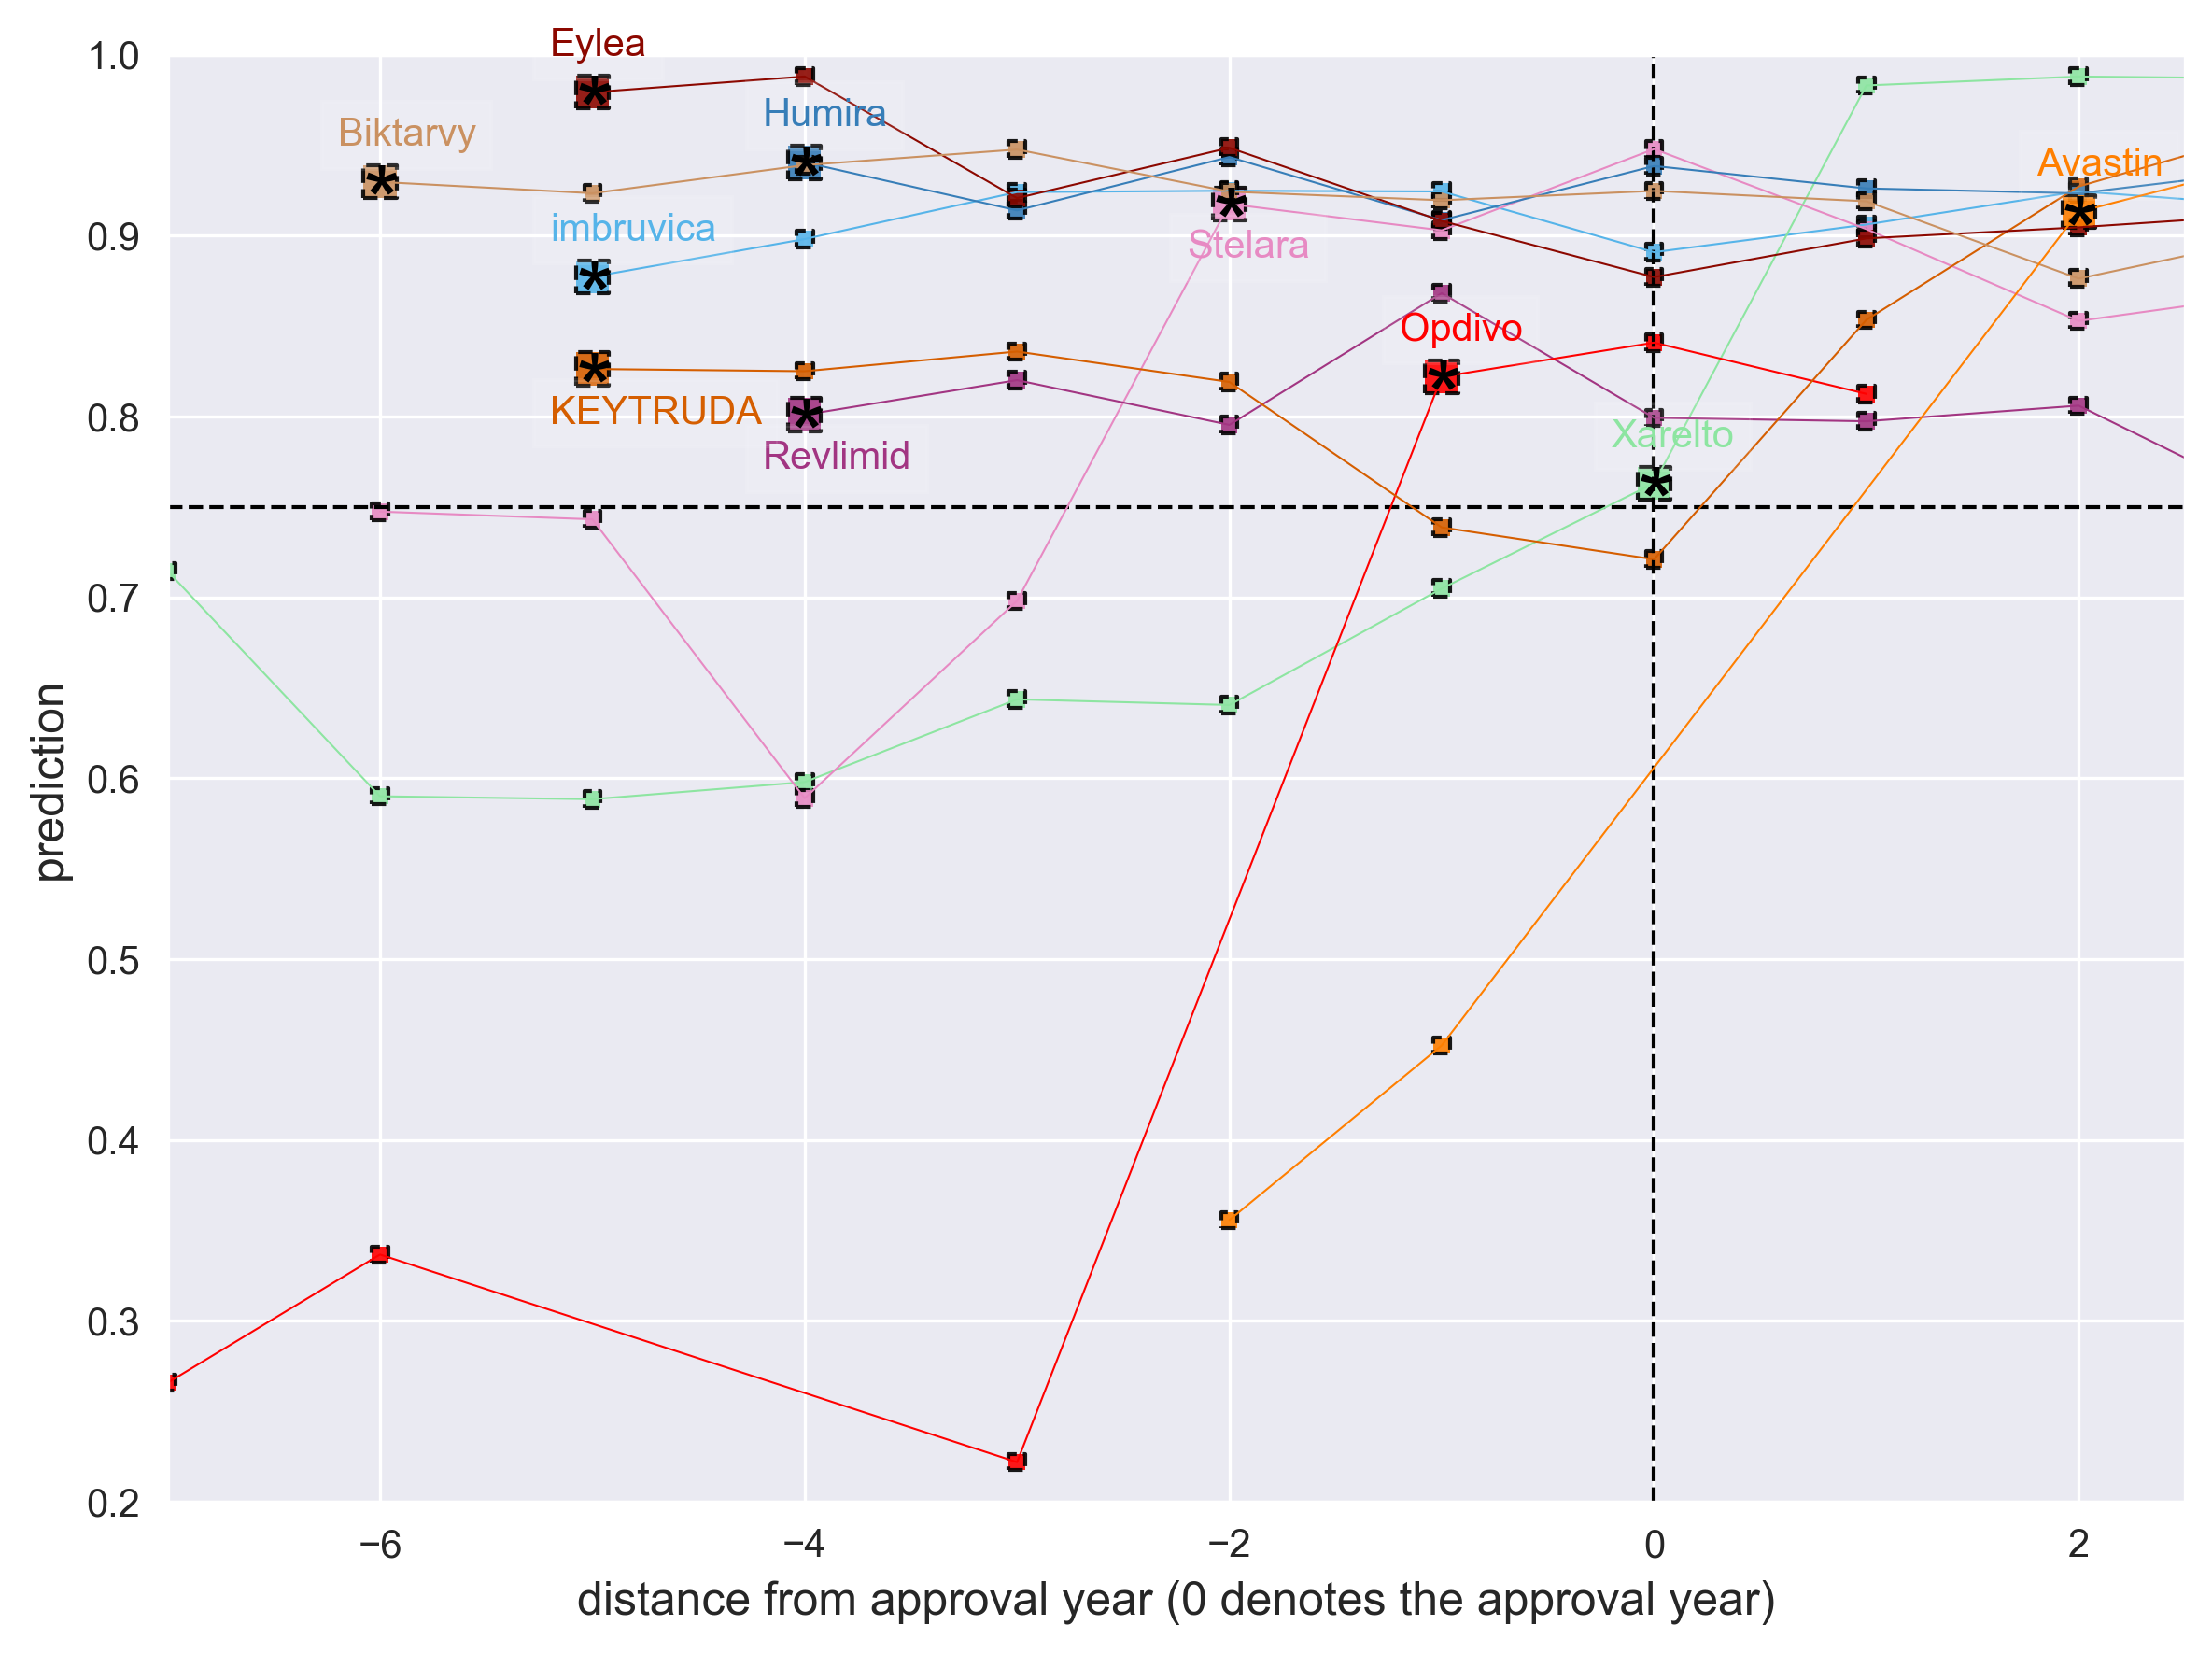

In [27]:
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    
    #print(lst)
    return lst

def first_signal(x,y):
    yr,pp = 0,0
    for i in range(0,len(x)):
        if y[i] >= 0.75:
            yr = x[i]
            pp = y[i]
            break
        i += 1
    return yr,pp

def plot_fig(data,x,y,fig):
    #print(data)

    
    c = {"Humira":"#377eb8","Revlimid":"#a23582","Avastin":"#ff7f00","Stelara":"#e78ac3","Xarelto":"#8de5a1",
         "Eylea":"#8c0800", "Opdivo":"red","imbruvica":"#56b4e9","KEYTRUDA":"#d55e00","Biktarvy":"#ca9161"}
    m = {"Humira":"o","Revlimid":"v","Avastin":"^","Stelara":"s","Xarelto":"p",
         "Eylea":"*", "Opdivo":"h","imbruvica":"D","KEYTRUDA":"8","Biktarvy":"X"}
    for ind in data.index:
        s = data['drug'][ind]
        sns.lineplot(x=data['x'][ind], y=data['y'][ind], dashes=False,color=c[s],linewidth = 0.5,alpha = 1)
        
        yr,pp = first_signal(data['x'][ind],data['y'][ind])
        
        dum = pd.DataFrame()
        dum['x'] = data['x'][ind]
        dum['y'] = data['y'][ind]
        dum['s'] = 0
        for i in dum.index:
            if dum['x'][i] == yr:
                dum['s'][i] = 20000
                break
        sns.scatterplot(data = dum,x='x', y='y', marker ='s',color=c[s],size = 's',legend = False,alpha = 0.9,
                       edgecolor='black',linewidth=1,
                linestyle='--')
        
        if s == "KEYTRUDA" or s == 'Stelara' or s == 'Revlimid':
            plt.text(yr-0.2, pp-0.03, s, fontsize = 10,color = c[s],bbox = dict(facecolor = 'white', alpha = 0.1))
        else:
            plt.text(yr-0.2, pp+0.02, s, fontsize = 10,color = c[s],bbox = dict(facecolor = 'white', alpha = 0.1))
        plt.text(yr-0.08, pp-0.030, "*", fontsize = 25,color = 'black')
        
      
        #sns.scatterplot(x=yr, y=pp, marker ="s",color=c[s],s = 30)
    plt.xlim([-7,2.5])
    plt.ylim([0.20,1])
    
    #plt.legend(c)
    #plt.ylim([0,1])
    return fig
    
fig = plt.figure(figsize=(8, 6), dpi = 300, tight_layout = True)
sns.set_style('darkgrid')
sns.set_palette('dark')
plt.axhline(y = 0.75, color = "black",linestyle = "--",lw=1)
plt.axvline(x = 0, color = "black",linestyle = "--",lw =1)
plt.xlabel("distance from approval year (0 denotes the approval year)", fontsize = 12)
plt.ylabel("prediction", fontsize = 12)


d = pd.read_csv("blockbuster_prediction2.csv")
d = d.drop_duplicates(subset = ["drug"])
#d = d.sample(frac=1).reset_index()
d = d.sort_values(by=['drug'],ascending = False)
#palette = itertools.cycle(sns.color_palette())

f = pd.DataFrame()
drg = []
xg = []
yg = []

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    #print(len(x))
    y = d['pp'][ind]
    y = convert(y)
    #tot = np.sum(y)
    #y = [a/tot for a in y]
    x = [a - d['approval_year'][ind] for a in x]
    
    drg.append(d['drug'][ind])
    xg.append(x)
    yg.append(y)
    
f['drug'] = drg
f['x'] = xg
f['y'] = yg
fig = plot_fig(f,x,y,fig)
fig.savefig("blockbuster.png", dpi = 1000)